In [1]:
# Fill in your name using the format below and student ID number
your_name = "MARINISSEN, DENNIS"
student_id = "0911604"

In [2]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [3]:
# # Uncomment the following line to run in Google Colab
# !pip install --quiet openml 

In [4]:
# # Uncomment the following line to run in Google Colab
# #%tensorflow_version 2.x
# import tensorflow as tf
# tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

In [5]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [6]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi DENNIS, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [7]:
# #base_dir = '/content/drive/My Drive/TestAssignment' # For Google Colab
# base_dir = '/content/drive/My Drive/JupyterNotebooks/2IMM15'
base_dir = '/Users/Dennis/Documents/Uni/Vakken/2IMM15_Web_information_retrieval_and_data_mining/Assignment 3/models'



In [8]:
# #Uncomment to link Colab notebook to Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [9]:
# # Use OpenML caching in Colab
# # On your local machine, it will store data in a hidden folder '~/.openml'
# import os
# oml.config.cache_directory = os.path.expanduser('/content/cache')

In [10]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [11]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [12]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

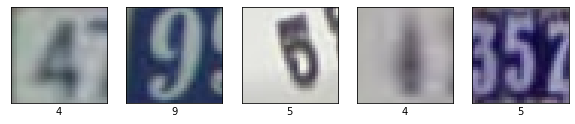

In [13]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [14]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Loading model from file
Success!
Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_12 (Reshape)         (None, 3072)              0         
_________________________________________________________________
dense_189 (Dense)            (None, 512)               1573376   
_________________________________________________________________
dense_190 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_191 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_192 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_193 (Dense)            (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
__________

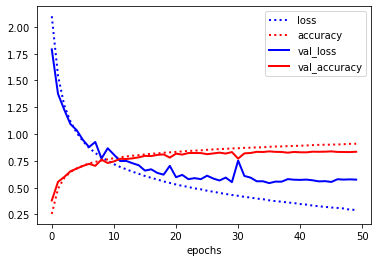

In [15]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import optimizers 

def build_model_1_1():
  # Init model
  model = models.Sequential()

  # Reshape layer
  model.add(layers.Reshape((3072,), input_shape=(32,32,3)))

  # Add (Dense) layers
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(256, activation='tanh'))
  model.add(layers.Dense(128, activation='tanh'))
  model.add(layers.Dense(64, activation='tanh'))

  # Output layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile and return model
  model.compile(optimizer=optimizers.SGD(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

# Evaluate
run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=False, epochs=50, batch_size=32)

In [39]:
answer_q_1_1 = """
Using sufficient layers without overdoing it is important, 4 layers gave a good fit.
512 nodes are used in the first layer, halving the number each layer to 256, 128 and 64. 
Softmax is suitable to output final prediction on the classification value. 
A batch size of 32 ensures a good number of iterations to learn.
SGD optimizer with tanh activations was most suitable for performance, with a lossfunction for multi-class classification."""

print("Answer is {} characters long".format(len(answer_q_1_1)))

Answer is 440 characters long


### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [17]:
def prep(X):
  # Mean normalisation
  X = X - np.mean(X, axis = 0)
  # Return image in grayscale
  return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

In [18]:
# Create pre-processed variables using function
X_train_gray = prep(X_train)
X_val_gray = prep(X_val)
X_test_gray = prep(X_test)
X_test_gray_only = np.expand_dims(np.dot(X_test, [0.2990, 0.5870, 0.1140]), axis=3)

# Create pre-processed split
preprocessed_split = X_train_gray, X_val_gray, y_train, y_val

Loading model from file
Success!
Model: "sequential_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_13 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_194 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_195 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_196 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_197 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_198 (Dense)            (None, 10)                650       
Total params: 697,930
Trainable params: 697,930
Non-trainable params: 0
______________

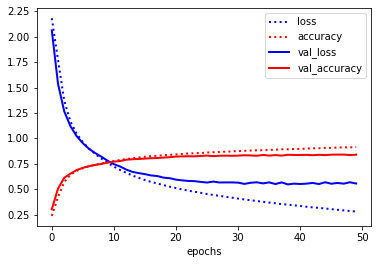

In [19]:
def build_model_1_2():
  # Init model
  model = models.Sequential()

  # Reshape layer
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

  # Add (Dense) layers
  model.add(layers.Dense(512, activation='tanh'))
  model.add(layers.Dense(256, activation='tanh'))
  model.add(layers.Dense(128, activation='tanh'))
  model.add(layers.Dense(64, activation='tanh'))

  # Output layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile and return model
  model.compile(optimizer=optimizers.SGD(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

# Evaluate
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=False, generator=False, epochs=50, batch_size=32)

In [20]:
answer_q_1_2 = """
Normalisation, cropping and shaping images uniformly was done on the initial data.
Mean normalisation and grayscale conversion are useful additions, which are implemented.
Whitening the image was tried, but did not have added value. Image-whitening is mostly working for more complex images.

Pre-processing resulted in performance improvement.
Running-time improvement and regularization ocurred as a result of reduced dimensionality."""

print("Answer is {} characters long".format(len(answer_q_1_2)))

Answer is 495 characters long


### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Loading model from file
Success!
Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_18 (Reshape)         (None, 1024)              0         
_________________________________________________________________
dense_227 (Dense)            (None, 1024)              1049600   
_________________________________________________________________
dense_228 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_83 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_229 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_230 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_84 (Dropout)

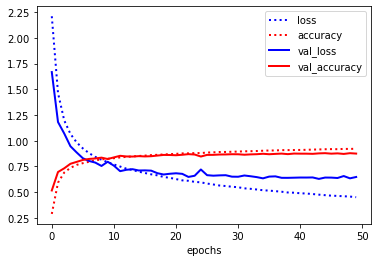

In [21]:
from tensorflow.keras import regularizers 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generate images through data augmentation and create new data split
image_generator = ImageDataGenerator(rotation_range=6,
                                      shear_range=0.12,
                                      zoom_range=0.12,
                                      horizontal_flip=False,
                                      vertical_flip=False,
                                      fill_mode='reflect')

image_generator.fit(preprocessed_split[0])

train_generator = image_generator.flow(preprocessed_split[0], 
                                       preprocessed_split[2], 
                                       batch_size=32)

step_size = train_generator.n//train_generator.batch_size

augmented_split = train_generator, preprocessed_split[1], preprocessed_split[3]

def build_model_1_3():

  # Init model
  model = models.Sequential()

  # Reshape layer
  model.add(layers.Reshape((1024,), input_shape=(32,32,1)))

  # Add (Dense) layers
  model.add(layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

  # Output layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile and return model
  model.compile(optimizer=optimizers.SGD(learning_rate=0.025),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

# Evaluate
run_evaluation("model_1_3", build_model_1_3, augmented_split, base_dir, 
               train=False, generator=True, steps_per_epoch=step_size,
               epochs=50, batch_size=64)


In [38]:
answer_q_1_3 = """
Data augmentation is implemented for more image data, working well to increase performance. 
Batch size is increased to ensure represenative batches and improve running times. 
Increasing learning rate helped in avoiding overfitting. 
Kernel Regularizer is applied. When used in moderation, using Dropout had a positive impact. 
By using a few more layers we deepen the network, increasing the learning capacity of the model."""

print("Answer is {} characters long".format(len(answer_q_1_3)))

Answer is 426 characters long


## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Loading model from file
Success!
Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 32, 32, 64)        1088      
_________________________________________________________________
batch_normalization_117 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_118 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_127 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_80 (Conv2D)  

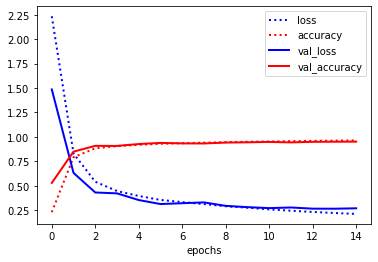

In [23]:
def build_model_2_1():

  # Init model
  model = models.Sequential()

  # Convolutional layers
  model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(128, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(256, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(512, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(512, (4, 4), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same'))  
  model.add(layers.Dropout(0.4))

  # Dense layer
  model.add(layers.Flatten())

  model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.4))

  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.2))

  model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
  model.add(layers.BatchNormalization())

  # Output layer
  model.add(layers.Dense(10, activation='softmax'))

  # Compile and return model
  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0075),
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

# Evaluate
run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=False, epochs=15, batch_size=64)


In [41]:
answer_q_2_1 = """
Multiple convolutional layers are implemented. 4 sets of 2 layers with increasing size, 
using BatchNormalisation every layer and Dropout and MaxPooling every block for regularization.
Padding is set to 'same' to maintain all information. 
Kernel_size (4, 4) is used for compatibility with the image dimensions.

Next are 3 Dense layers, performing the final class prediction using Softmax. 
Relu is used as activation as this introduces sparcity, avoiding saturation and increasing efficiency."""

print("Answer is {} characters long".format(len(answer_q_2_1)))

Answer is 495 characters long


### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Loading model from file
Success!
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_118 (Conv2D)          (None, 32, 32, 64)        1088      
_________________________________________________________________
batch_normalization_172 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_119 (Conv2D)          (None, 32, 32, 64)        65600     
_________________________________________________________________
batch_normalization_173 (Bat (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_67 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_157 (Dropout)        (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_120 (Conv2D) 

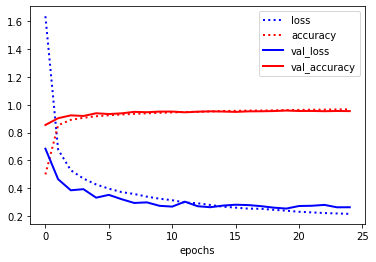

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Generate images through data augmentation and create new data split
image_generator_2 = ImageDataGenerator(rotation_range=3,
                                      shear_range=0.5,
                                      zoom_range=0.05,
                                      width_shift_range=1.0,
                                      height_shift_range=1.0,
                                      horizontal_flip=False,
                                      vertical_flip=False,
                                      fill_mode='nearest')

image_generator_2.fit(preprocessed_split[0])

train_generator_2 = image_generator_2.flow(preprocessed_split[0], 
                                       preprocessed_split[2], 
                                       batch_size=32)

step_size_2 = train_generator_2.n//train_generator_2.batch_size

augmented_split_2 = train_generator_2, preprocessed_split[1], preprocessed_split[3]

# Evaluate on model 2.1
run_evaluation("model_2_2", build_model_2_1, augmented_split_2, base_dir,
               train=False, generator=True, steps_per_epoch=step_size_2,
               epochs=25, batch_size=None) 


In [26]:
answer_q_2_2 = """
For the data augmentation many options were explored. 
Flipping does not make sense here as numbers cannot be recognised anymore when flipped. In StreetView perspective also a flipped perspective is not relevant. 
A realistic amount of rotation, shear and zoom is applied. This makes sense to train the model in handling different perspectives and zooms well.
A small improvement is seen in performance as a result of the data augmentation."""

print("Answer is {} characters long".format(len(answer_q_2_2)))

Answer is 485 characters long


## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

In [27]:
from sklearn.metrics import confusion_matrix
import math

SVHN_classes = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 
                6: "6", 7: "7", 8: "8", 9: "9", 10: "0"}

model_2_2 = load_model_from_file(base_dir, "model_2_2")

y_pred = model_2_2.predict(X_test_gray)

num_total_samples = len(y_pred)
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]
num_misclassified_samples = len(misclassified_samples)
num_correctly_classified_samples = num_total_samples - num_misclassified_samples

misclassified_fours = np.array([x for x in np.nonzero((np.argmax(y_test, axis=1)+1)%10 == 4)[0] if x in misclassified_samples])

test_accuracy = num_correctly_classified_samples / num_total_samples

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots(figsize=(6, 6))
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  labels = SVHN_classes.values()
  ax.set_xticklabels(labels)
  ax.set_yticklabels(labels)
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
    ax.text(int(i/10), i%10, cm[i%10, int(i/10)], ha="center", va="center", color="w")
  plt.show()


def plot_misclassifications():
  print('\n Misclassified examples: ')
  rows = 5
  columns = 5
  fig, axes = plt.subplots(rows, columns, figsize=(columns*2, rows*8/3))
  count = 0
  for i in range(rows):
    for j in range(columns):
      if SVHN_classes[np.argmax(y_test[misclassified_fours[count]])+1] == "4":
        axes[i, j].imshow(X_test[misclassified_fours[count]])
        axes[i, j].set_xlabel("Predicted: %s,\n Actual : %s" % 
                              (SVHN_classes[np.argmax(y_pred[misclassified_fours[count]])+1], 
                              SVHN_classes[np.argmax(y_test[misclassified_fours[count]])+1]))
        axes[i, j].set_xticks(()), axes[i, j].set_yticks(())
        count += 1
      else:
        pass
  plt.show()

# plot_confusion_matrix()
# plot_misclassifications()


In [42]:
answer_q_3_1 = """
1 and 7 are logically mixed up often. Rotated versions of 6 and 9 are difficult for the model. 
Since number 4 is predicted relatively accurately, misclassifications there are interesting.
An overhand in extremely noisy or blurry images is seen, together with weird types of numbers (even letters).
Objects (partly) blocking the number is also a factor. 
When there are multiple numbers in one number image, it is prone to picking an other numbers than the labelled one.
Some numbers are actually mislabeled. In the test set about 20 wrongly labelled images were found.

These factors are the main reasons for misclassifications."""

print("Answer is {} characters long".format(len(answer_q_3_1)))

Answer is 630 characters long


### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

In [29]:

def plot_activations():

  model_2_2 = load_model_from_file(base_dir, "model_2_2")

  # model_2_2.summary()

  num_layers = len(model_2_2.layers)

  index = 0

  image = X_test_gray[index].reshape(1, 32, 32, 1)

  # Extracts the outputs of the top 8 layers:
  layer_outputs = [layer.output for layer in model_2_2.layers[:num_layers]]

  # Store layer names 
  layer_names = []
  for layer in model_2_2.layers[:num_layers]:
    layer_names.append(layer.name)

  # Create model 
  activation_model = models.Model(inputs=model_2_2.input, outputs=layer_outputs)

  activations = activation_model.predict(image)

  plt.rcParams['figure.dpi'] = 120
  first_layer_activation = activations[0]

  f, (ax1, ax2) = plt.subplots(1, 2, figsize=(5,5))
  ax1.imshow(X_test[index])
  ax2.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
  ax1.set_xticks([])
  ax1.set_yticks([])
  ax2.set_xticks([])
  ax2.set_yticks([])
  ax1.set_xlabel('Input image')
  ax2.set_xlabel('Activation of filter 2');
  plt.show()

  images_per_row = 24
  begin = 0
  stop = num_layers 
  index = 0

  # Display feature maps
  for layer_name, layer_activation in zip(layer_names[begin:stop], activations[begin:stop]):
    if layer_name.startswith('conv'):
      num_features = layer_activation.shape[-1]
      size = layer_activation.shape[1]
      num_cols = num_features // images_per_row
      display_grid = np.zeros((size * num_cols, images_per_row * size))

      for col in range(num_cols):
          for row in range(images_per_row):
              channel_image = layer_activation[0, :, :,
                                                col * images_per_row + row]
              channel_image -= channel_image.mean()
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size,
                            row * size : (row + 1) * size] = channel_image

      # Display grid
      scale = 1. / size / 2
      plt.figure(figsize=(scale * display_grid.shape[1],
                          scale * display_grid.shape[0]))
      plt.title("Activation of layer {} ({})".format(index+1, layer_name))
      plt.grid(False)
      plt.imshow(display_grid, aspect='auto', cmap='viridis')
    else:
      pass

    index += 1

  pass

# plot_activations()


In [43]:
answer_q_3_2 = """
In the activations you see that in the first layers the patterns of the are still very clear, clearly showing activations on edges.
The deeper in the network, the higher the abstraction of the activations. 
Some parts are active up to deep in the network, others are not. 
This may indicate that it does not learn perfectly on this image. 
However, the principle of learning by the model is well shown though the visualised activations."""

print("Answer is {} characters long".format(len(answer_q_3_2)))

Answer is 437 characters long


### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


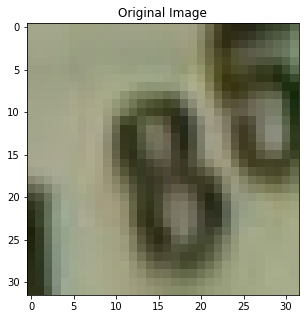

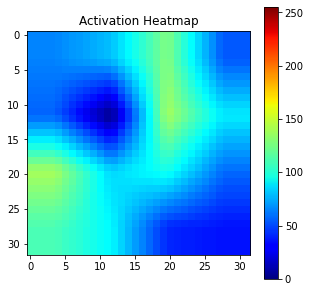

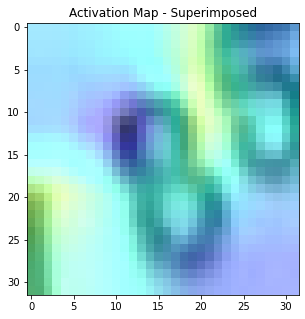

In [31]:
import cv2
import tensorflow as tf
from tensorflow.keras import backend

def plot_3_3():

  tf.compat.v1.disable_eager_execution()

  # Load model and activation layer from the model
  model_2_2 = load_model_from_file(base_dir, 'model_2_2')
  model_2_2._make_predict_function()
  model_2_2_output = model_2_2.output[:,0]
  activation_layer = model_2_2.layers[20]

  # Load first image from test set
  image_index = 0
  image = X_test_gray_only[image_index]
  image = np.expand_dims(image, axis=0)

  # Gradient values
  gradients = backend.gradients(model_2_2_output, activation_layer.output)[0]
  stack_gradients = backend.mean(gradients, axis=(0,1,2))
  iterator = backend.function([model_2_2.input], [stack_gradients, activation_layer.output[0]])
  stack_gradients_val, activation_layer_output = iterator([image])

  for i in range(128):
      activation_layer_output[:,:,i] *= stack_gradients_val[i]

  # Setting heatmap and plotting
  heatmap = np.mean(activation_layer_output, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap = heatmap / np.max(heatmap)
  heatmap = cv2.resize(heatmap, (32, 32))
  heatmap = cv2.applyColorMap(np.uint8(255 * heatmap), cv2.COLORMAP_JET)

  image_colour = (255 * X_test[image_index]).astype(int)
  image_superimposed = image_colour + heatmap/2

  plt.figure(figsize=(5, 5))
  plt.title('Original Image')
  plt.imshow(image_colour)
  
  plt.figure(figsize=(5, 5))
  plt.title('Activation Heatmap')
  plt.imshow(heatmap, cmap='jet')
  plt.colorbar()

  plt.figure(figsize=(5, 5))
  plt.title("Activation Map - Superimposed")
  plt.imshow(image_superimposed.astype(int), cmap='jet')

  plt.show()

# plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x22dfd3ac8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x22dfcb940> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x22dfcb630> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262bdbf60> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262bfea20> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x262bfeda0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262c843c8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262c89eb8> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262c91438> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x262c97ef0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262ca7550> True
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x262cab320> True
<tensorflow.python

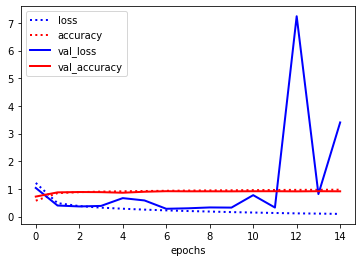

In [32]:
from tensorflow.keras.applications.vgg16 import VGG16

def build_model_4_1():

  # Load pre-trained VGG16 model (without Dense block)
  model_VGG16 = VGG16(include_top=False, input_shape=(32, 32, 3))

  # Initialize model
  model_VGG16_conv = models.Sequential()

  # Bound which convolutional layers to freeze
  nonfrozen = 8
  count = 0

  # Build new model, adding layers
  for layer in model_VGG16.layers:
    layer_name = layer.name
    # Freezing layers
    if count < len(model_VGG16.layers) - nonfrozen:
      layer.trainable = False
    elif layer_name.endswith('pool'):
      layer.trainable = False
    else:
      pass
    model_VGG16_conv.add(layer)
    count += 1

  # Add dense classification output layer
  model_VGG16_conv.add(layers.Flatten())
  model_VGG16_conv.add(layers.Dense(256, activation='relu'))
  model_VGG16_conv.add(layers.BatchNormalization())
  model_VGG16_conv.add(layers.Dropout(0.2))
  model_VGG16_conv.add(layers.Dense(128, activation='relu'))
  model_VGG16_conv.add(layers.BatchNormalization())
  model_VGG16_conv.add(layers.Dropout(0.2))

  model_VGG16_conv.add(layers.Dense(10, activation='softmax'))

  # Check which layers are frozen
  for layer in model_VGG16_conv.layers:
    print(layer, layer.trainable)

  # Compile and return model
  model_VGG16_conv.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  return model_VGG16_conv

# Evaluate
run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=False, epochs=15, batch_size=64)


In [33]:
answer_q_4_1 = """
The last 2 blocks of Conv layers are unfreezed for proper learning, which worked best to train the model.
Regularization is applied and Dense layers are added for the class prediction using Softmax.
Unfreezing enough convolutional layers was definitely needed to train the model properly.
The final model showed good results with an accuracy of approx 92%."""

print("Answer is {} characters long".format(len(answer_q_4_1)))

Answer is 401 characters long


### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [34]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pickle
import gzip

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  # Import model
  model_4_1 = load_model_from_file(base_dir, "model_4_1")

  # Init new model
  model_4_1_conv = models.Sequential()

  # Add all convolutional layers
  for layer in model_4_1.layers[:-8]:
      model_4_1_conv.add(layer)
  
  # Flatten and compile
  model_4_1_conv.add(layers.Flatten())
  model_4_1_conv.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), 
                         loss='categorical_crossentropy',
                         metrics=['accuracy'])

  # Predict classes and store embeddings
  X_test_embedding = model_4_1_conv.predict(X_test)
  store_embedding(X_test_embedding, 'X_test')
  X_train_embedding = model_4_1_conv.predict(X_train)
  store_embedding(X_train_embedding, 'X_train')

def generate_pipeline():
  # Return pipeline
  return make_pipeline(StandardScaler(), SVC())

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  # Fit data
  pipeline.fit(X_train, y_train)

  # Return accuracy
  return pipeline.score(X_test, y_test)

def evaluation_4_2(X_train, y_train, X_test, y_test):
  # Load embeddings and generate pipeline
  X_train_embedding = load_embedding('X_train')
  X_test_embedding = load_embedding('X_test')
  pipe = generate_pipeline()

  # Return accuracy by evaluating
  return evaluate_pipeline(pipe, 
                           X_train_embedding, 
                           np.argmax(y_train, axis=1), 
                           X_test_embedding, 
                           np.argmax(y_test, axis=1))


In [35]:
answer_q_4_2 = """
Several pre-processing and classification models have been explored. 
Using StandardScaler and RandomForestClassifier gave good results. Differences between models and classifiers were not very significant.
Thusfar, an accuracy of just over 92% is the best perfoming model for 4.1. 
Here we see about 0.5% improvement."""

# store_embeddings()
print("Pipeline: ", generate_pipeline())
# print("Accuracy: ", evaluation_4_2(X_train, y_train, X_test, y_test))
print("Answer is {} characters long".format(len(answer_q_4_2)))

Pipeline:  Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 363 characters long
